# 13.1

Beweise, dass:

$$ \gamma(i,j) = E(X_i,X_j)-\mu(i)\mu(j) $$

aus der Definition:

$$ \gamma(i,j) = E[(X_i-\mu(i))(X_j-\mu(j))] $$

folgt:

$$ = E[X_i X_j - X_i \mu(j) - X_j \mu(i) + \mu(i) \mu(j)] $$

Der Erwartungswert von $X_i$ und $X_j$ ist $\mu(i)$ bzw. $\mu(j)$:

$$ = E[X_i X_j] - \mu(i) \mu(j) - \mu(i) \mu(j) + \mu(i) \mu(j) $$

$$ = E(X_i X_j) - \mu(i) \mu(j) $$

# 13.2

## a)

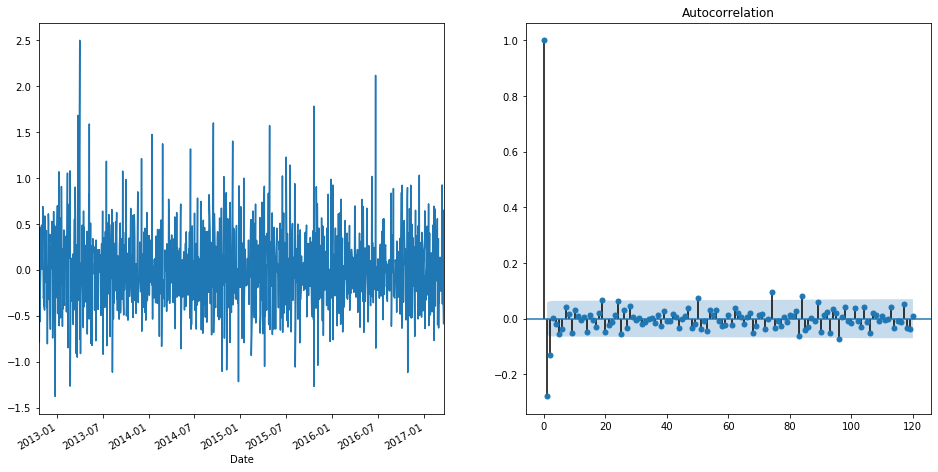

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

matplotlib.rcParams['figure.figsize'] = [16, 8]

tesla = pd.read_csv('tesla.csv', sep='\t', header=0)
tesla['Date'] = pd.DatetimeIndex(tesla['Date'])
tesla.set_index('Date', inplace=True)

tesla['log_volume'] = np.log(tesla['Volume'])
tesla['log_return'] = tesla['log_volume'] - tesla['log_volume'].shift(1)
fig, (ax1, ax2) = plt.subplots(ncols=2)
tesla['log_return'].plot(ax=ax1)
plot_acf(pd.DataFrame(tesla['log_return']).dropna(), lags=120, ax=ax2)
plt.show()

## b)

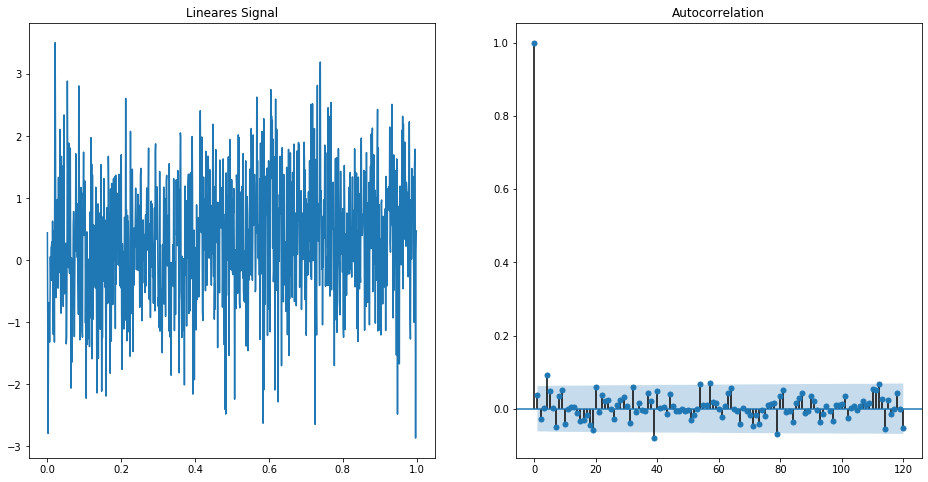

In [5]:
from scipy import signal as sig

n = 1000
t = np.linspace(0, 1, n, endpoint=False)
noise = np.random.normal(size=n)
signal = 0.5*t + noise
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Lineares Signal')
ax1.plot(t, signal)
plot_acf(pd.DataFrame(signal + noise).dropna(), lags=120, ax=ax2)
plt.show()

## c)

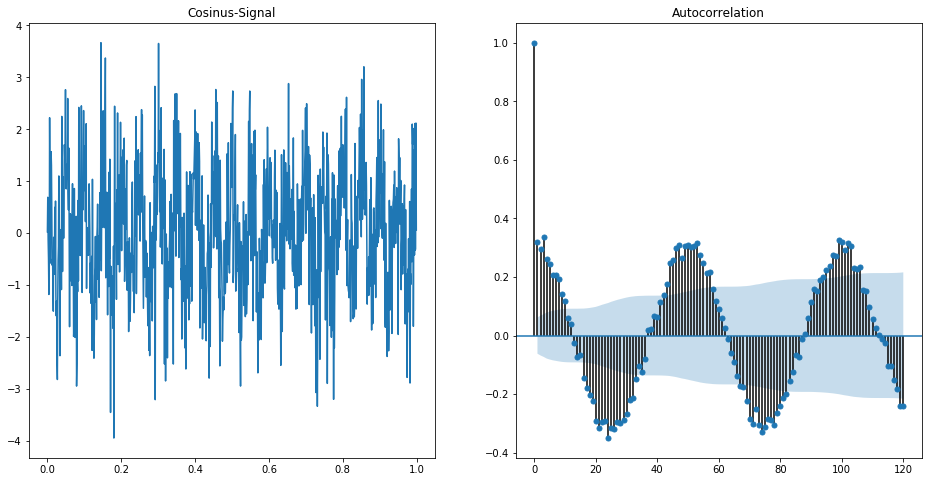

In [6]:
n = 1000
t = np.linspace(0, 1, n, endpoint=False)
noise = np.random.normal(size=n)
signal = np.cos(2 * np.pi * 20 * t)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Cosinus-Signal')
ax1.plot(t, signal + noise)
plot_acf(pd.DataFrame(signal + noise).dropna(), lags=120, ax=ax2)
plt.show()

## d)

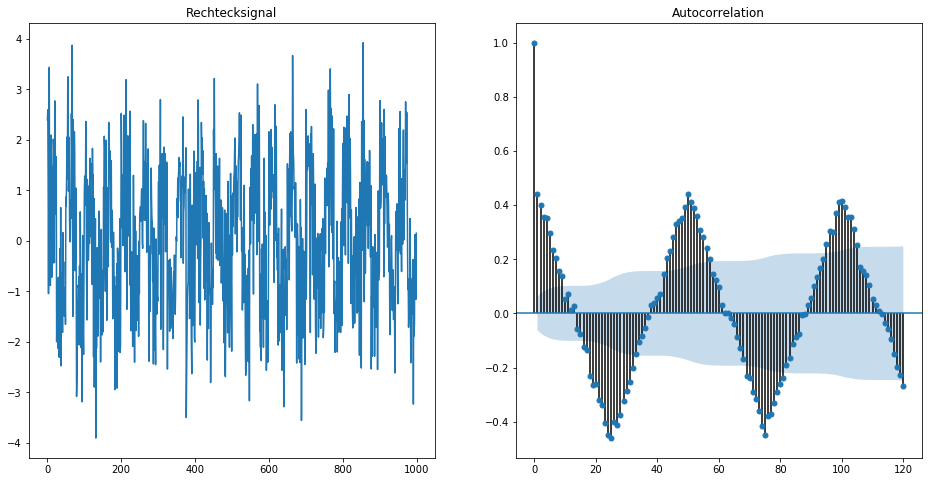

In [11]:
n = 1000
t = np.linspace(0, 1, n, endpoint=False)
noise = np.random.normal(size=n)
signal = sig.square(2 * np.pi * 20 * t)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Rechtecksignal')
ax1.plot(signal + noise)
plot_acf(pd.DataFrame(signal + noise).dropna(), lags=120, ax=ax2)
plt.show()

## e)

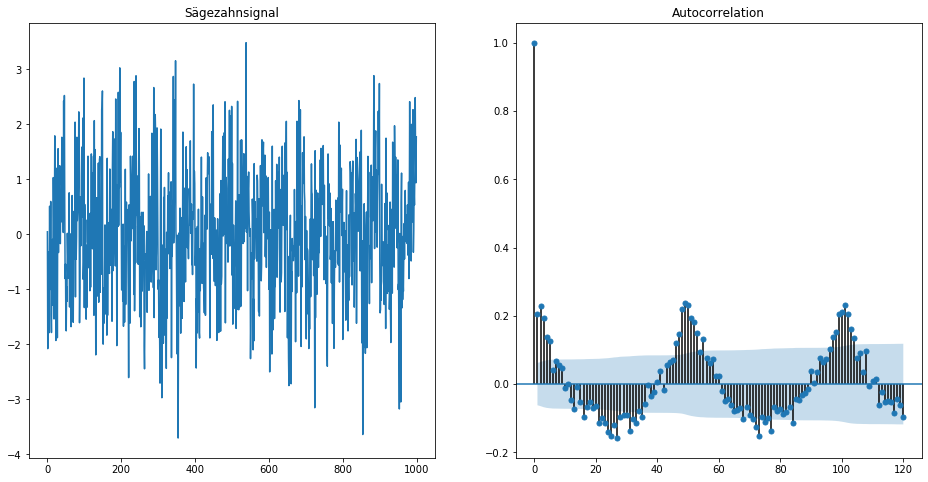

In [9]:
n = 1000
t = np.linspace(0, 1, n, endpoint=False)
noise = np.random.normal(size=n)
signal = sig.sawtooth(2 * np.pi * 20 * t)
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Sägezahnsignal')
ax1.plot(signal + noise)
plot_acf(pd.DataFrame(signal + noise).dropna(), lags=120, ax=ax2)
plt.show()

# 13.3

## a)

gegeben:

$$ X_i = T + (1 - i), T \sim \mathcal{U}([0,1]) $$

gesucht:

$$ \gamma(i,j) $$

aus der Definition von $\gamma(i,j)$:

$$ \gamma(i, j) = E[(X_i - \mu(i))(X_j - \mu(j))] $$

und der Definition von $X_i$ folgt:

$$ \underline{E[X_i]} = E[T + (1 - i)] = E[T] + E[1-i] = E[T] + E[1] - E[i] = \underline{E[T] + 1 - i} $$

Definition Erwartungswert von uniform-verteilter Variable:

$$ \underline{E[X]} = \int_{-\infty}^{\infty} x f(x) \mathcal{d}x = \frac{1}{b-a} \int_a^b x \mathcal{d} x = \frac{1}{2} \frac{b^2-a^2}{b-a} = \frac{1}{2} \frac{(b-a)(b+a)}{b-a} = \underline{\frac{b+a}{2}} $$

auf $E[T]$ angewandt:

$$ \underline{E[T]} = \frac{b+a}{2} = \underline{\frac{1}{2}} $$

eingesetzt in $E[X_i]$:

$$ \underline{E[X_i]} = E[T] + 1 - i = \frac{1}{2} + 1 - i = \underline{\frac{3}{2} - i} = \underline{\mu(i)} $$

eingesetzt in $\gamma(i,j)$:

$$ \gamma(i,j) = E \Big [ \Big( T + (1 - i) - \Big( \frac{3}{2} - i \Big) \Big) \Big( T + (1 - j) - \Big( \frac{3}{2} - j \Big) \Big) \Big] $$

$$ \gamma(i,j) = E \Big [ \Big( T + 1 - i - \frac{3}{2} + i \Big) \Big( T + 1 - j - \frac{3}{2} + j \Big) \Big] $$ 

$$ \gamma(i,j) = E \Big [ \Big( T - \frac{1}{2} \Big) \Big( T - \frac{1}{2} \Big) \Big] = E \Big [ \Big( T - \frac{1}{2} \Big)^2 \Big] $$ 

$$ \gamma(i,j) = E \Big [ T^2 - T + \frac{1}{4} \Big ] = E[T^2] - E[T] + E \Big[\frac{1}{4} \Big] $$

mit der Definition Erwartungswert von $X^2$:

$$ E[X^2] = \int_{-\infty}^{\infty} x^2 fx(x)\mathcal{d}x = \int_a^b x^2 \mathcal{d}x $$

kann $E[T^2]$ berechnet werden:

$$ E[T^2] = \int_0^1 t² \mathcal{d}t = \Big[ \frac{1}{3} t^3 \Big]^1_0 = \frac{1}{3} $$

eingesetzt in $\gamma(i,j)$:

$$ \underline{\underline{\gamma(i,j)}} = E[T^2] - E[T] + E\Big[\frac{1}{4}\Big] = \frac{1}{3} - \frac{1}{2} + \frac{1}{4} = \underline{\underline{\frac{1}{12}}} $$

Da der Scharmittelwert von der Zeit $i$ abhängig ist, handelt es sich um einen **nicht-stationären** Prozess.

## b)

gegeben:

$$ X_n = A^n, A \sim \mathcal{U}([0,1]), n \in \mathbb{N}_0^+ $$

gesucht:

$$ \mu(n) = E[X_n], \gamma(n,m) $$

Erwartungswert $E[X_n]$:

$$ \underline{E[X_n]} = E[A^n] = \int_0^1 a^n \mathcal{d}a = \Big[ \frac{1}{n+1} a^{n+1} \Big]_0^1 = \frac{1^{n+1}}{n+1} - \frac{0^{n+1}}{n+1} = \underline{\frac{1}{n+1} = \gamma(n)} $$

Autokorrelation $\gamma(m,n)$:

$$ \gamma(n,m) = E \Big[ \Big( X_n - \frac{1}{n+1} \Big) \Big( X_m - \frac{1}{m+1} \Big) \Big] $$

$$ \gamma(n,m) = E \Big[ X_n X_m - \frac{X_n}{m+1} - \frac{X_m}{n+1} + \frac{1}{(n+1)(m+1)} \Big] $$

eingesetzt:

$$ \gamma(n,m) = E[A^{n+m}] - \frac{E[A^n]}{m+1} - \frac{E[A^m]}{n+1} + \frac{1}{(n+1)(m+1)} $$

$$ \gamma(n,m) = E[A^{n+m}] - \frac{\frac{1}{n+1}}{m+1} - \frac{\frac{1}{m+1}}{n+1} + \frac{1}{(n+1)(m+1)} $$

$$ \gamma(n,m) = E[A^{n+m}] - \frac{1}{(n+1)(m+1)} - \frac{1}{(n+1)(m+1)} + \frac{1}{(n+1)(m+1)} $$

$$ \gamma(n,m) = E[A^{n+m}] - \frac{1}{(n+1)(m+1)} $$

Erwartungswert $E[A^{n+m}]$:

$$ \underline{E[A^{n+m}]} = \int_0^1 a^{n+m} \mathcal{d} a = \frac{1}{n+m+1} a^{n+m+1} \Big|_0^1 = \underline{\frac{1}{n+m+1}} $$

eingesetzt:

$$ \underline{\underline{\gamma(n,m) = \frac{1}{n+m+1} - \frac{1}{(n+1)(m+1)}}} $$

Es handelt sich um einen **nicht-stationären Prozess**, da $\mu(n)$ bzw. $\mu(m)$ und $\gamma(n,m)$ von n und m abhängig sind.

# 13.4

$$ X_i = W_{i-1} + 2W_i + W_{i+1} $$

Varianz $\sigma^2$, Erwartungswert $0$

##  a)

gesucht: Mittelwertsfolge

Da alle $W$ Zufallsvariablen mit dem Erwartungswert $0$ sind, hat eine Linearkombination aus diesen Mittelwerten ebenfalls den Mittelwert $0$:

$$ \underline{\underline{\mu(i)=0}} $$

## b)

gesucht: Autokovarianz, Autokorrelationsfolge

### Autokovarianz

Für $j=i$ (lag 0):

$$ \gamma(i, i) = E[(W_{i-1} + 2W_i + W_{i+1})(W_{i-1} + 2W_i + W_{i+1})] $$

Es gilt $E(X_i X_j)=0$, falls $i \neq j$:

$$ \gamma(i, i) = E(W_{i-1}^2) + 4E(W_i^2) + E(W_{i+1}^2) $$

Da es sich hierbei um ein weisses Rauschen handelt, gilt $E[W]=\sigma^2$:

$$ \underline{\gamma(i, i)} = \sigma^2 + 4\sigma^2 + \sigma^2 = \underline{6\sigma^2} $$

Für $j=i+1$ (lag 1):

$$ \gamma(i, i+1) = E[(W_{i-1} + 2W_i + W_{i+1})(W_i + 2W_{i+1} + W_{i+2})] $$

$$ \underline{\gamma(i, i+1)} = 2e[W_i^2] + 2E[W{i+1}^2 = 2\sigma^2 + 2\sigma^2 = \underline{4\sigma^2} $$

Für $j=1+1$ (lag 2):

$$ \gamma(i, i+2) = E[(W_{i-1} + 2W_i + W_{i+1})(W_{i+1} + 2W_{i+2} + W_{i+3})] $$

$$ \underline{\gamma(i, i+2)} = E[W_{i+1}^2 = \underline{\sigma^2} $$

### Autokorrelation

Definition:

$$ \rho(i,j) = \frac{\gamma(i,j)}{\gamma(i,i)} $$

Für $j=i$ (lag 0):

$$ \rho(i,j) = \frac{6\sigma^2}{6\sigma^2} = 1 $$

Für $j=i+1$ (lag 1):

$$ \rho(i,j) = \frac{4\sigma^2}{6\sigma^2} = \frac{2}{3} $$

Für $j=i+2$ (lag 2):

$$ \rho(i,j) = \frac{\sigma^2}{6\sigma^2} = \frac{1}{6} $$

## c)

$$ \rho(h) = \{ (0,1), (1, 2/3), (2, 1/6) \} $$

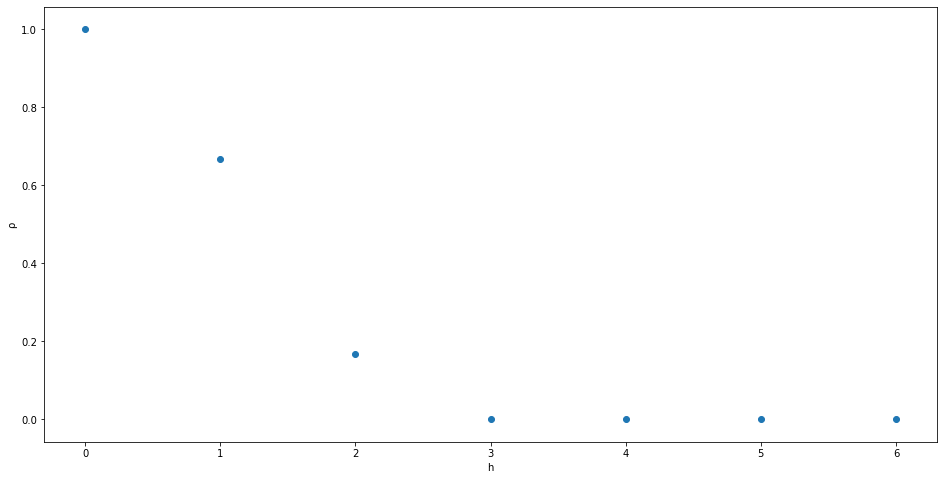

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = [16, 8]

hs = np.array([0, 1, 2, 3, 4, 5, 6])
rhos = np.array([1, 2/3, 1/6, 0, 0, 0, 0])

plt.scatter(hs, rhos)
plt.xlabel('h')
plt.ylabel('ρ')
plt.show()

# 13.5

## a)

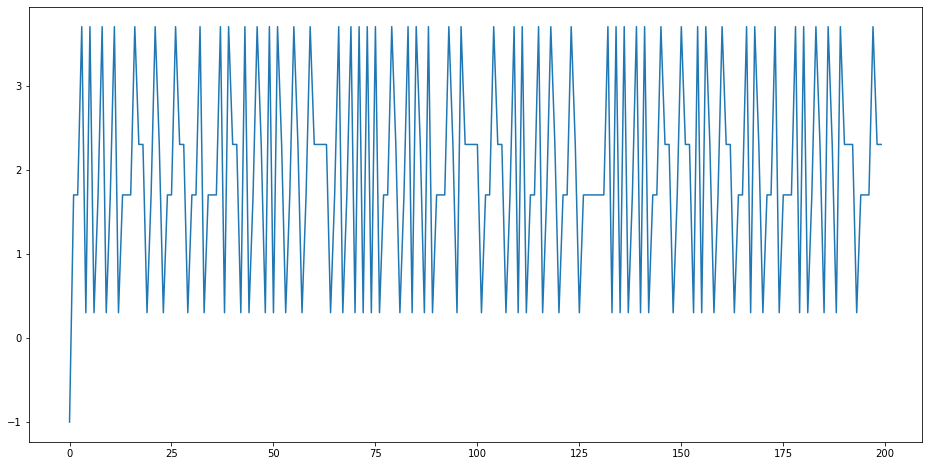

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = [16, 8]
a = 2
b = -0.7 # -7 or -0.7? difference between instruction and solution!
n = 200

D = 2 * (np.random.binomial(size=n, n=1, p=0.5) - 0.5)

X = np.zeros(n)
X[0] = -1
for k in range(1, n):
    X[k] = a + D[k] + b * D[k-1]
plt.plot(X)
plt.show()

## b)

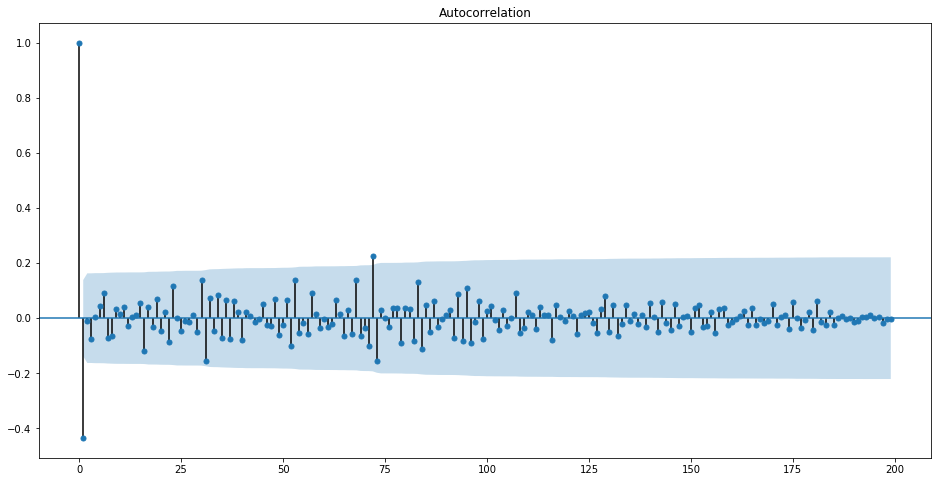

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(X)
plt.show()

## c)

$$ \mu(i) = E(X_i) = a + E(D_k) + b \cdot E(D_{k-1}) = a $$

Für $k=j$:

$$ \underline{\gamma(k,k)} = E[(D_k + b \cdot D_{k-1})(D_k + b \cdot D_{k-1})] = E[D_k^2 + 2 \cdot b \cdot D_{k-1} \cdot D_k + b^2 \cdot D_{k-1}^2] = 1 + 0 + b^2 = \underline{1+b^2} $$

Für $k=j+1$:

$$ \underline{\gamma(k,k+1)} = E[(D_k + b \cdot D_{k-1})(D_{k+1}+b \cdot D_k)] = E[D_k \cdot D_{k+1} + b \cdot D_k^2 + b \cdot D_k \cdot D_{k+1} + b^2 \cdot D_k \cdot D_{k-1}] = \underline{b} $$

Definition von $\rho(k,j)$:

$$ \rho(k,j) = 1, j=k $$

$$ \rho(k,j) = \frac{b}{1+b^2}, j=k+1 $$

$$ \rho(k,j) = 0, \text{sonst} $$

Ergebnis für $\rho(1)$:

$$ \rho(k,j) = \frac{\gamma(k,k+1}{\gamma(k,k)} = \frac{b}{1+b^2} $$

$$ \underline{\underline{\rho(1)}} = \frac{b}{1+b^2} = \frac{-0.7}{1+(-0.7)^2} = \underline{\underline{-0.469}} $$

In [28]:
from statsmodels.tsa.stattools import acf

print('^ρ(1)={:.5f}'.format(acf(X)[1]))

^ρ(1)=-0.43515


$$ \underline{\underline{\hat{\rho}(1) = -0.43515}} $$

## d)

Mittelwert konstant und Autokorrelationsfolge nur vom Lag abhängig: Prozess $X_k$ **ist schwach-stationär**.

# 13.6

## a)

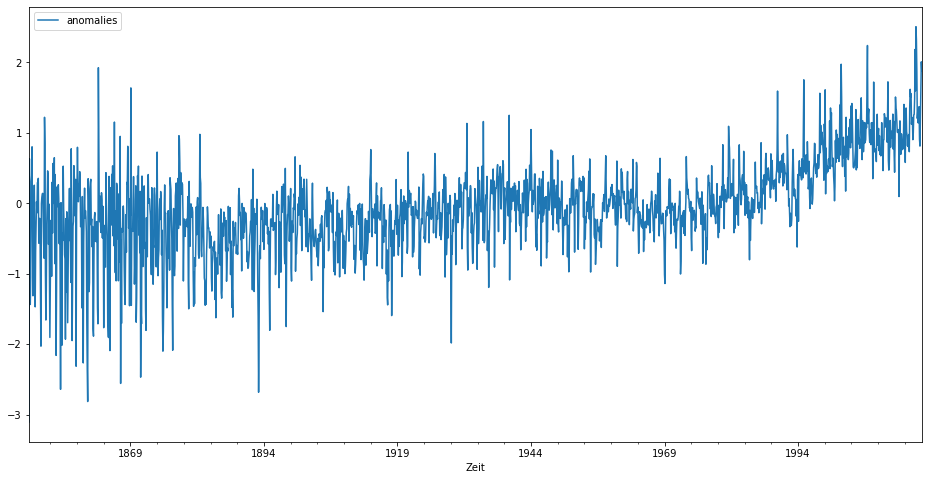

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [16, 8]

global_temp = pd.read_csv('global-temp.csv')
global_temp['Zeit'] = pd.DatetimeIndex(global_temp['Zeit'])
global_temp.set_index('Zeit', inplace=True)
global_temp.plot()
plt.show()

## b)

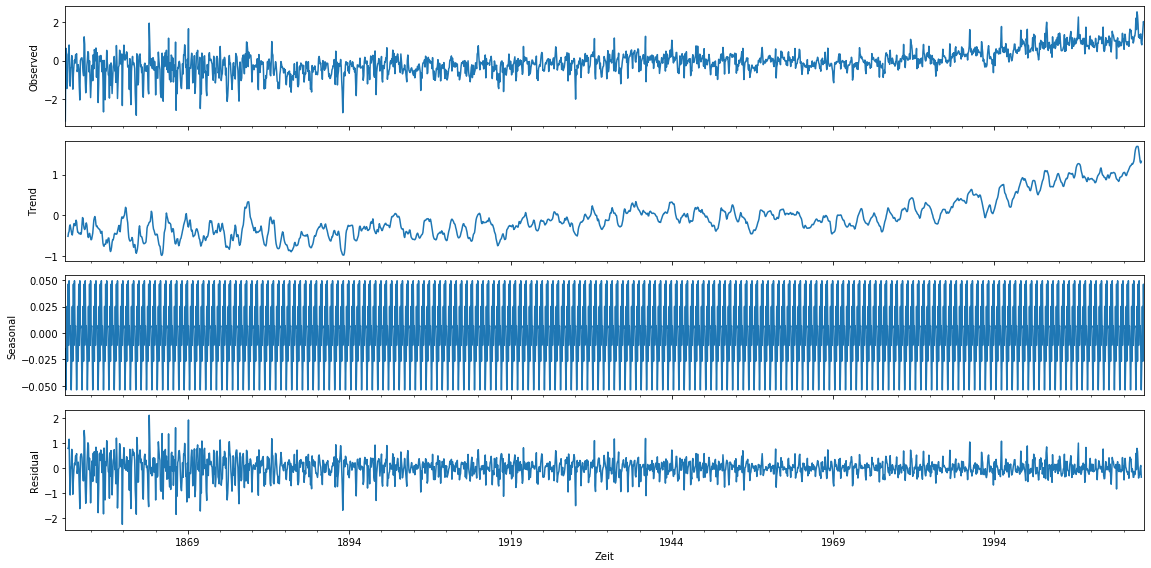

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(global_temp['anomalies'], model='additive', freq=10).plot()
plt.show()

Es ist ein steigender Trend erkennbar ab ca. 1970. Die Residuen für das 19. Jahrhundert sind massiv grösser. Möglicherweise ist das auf die Messinstrumente von damals (höhere Varianz) zurückzuführen.

## c)

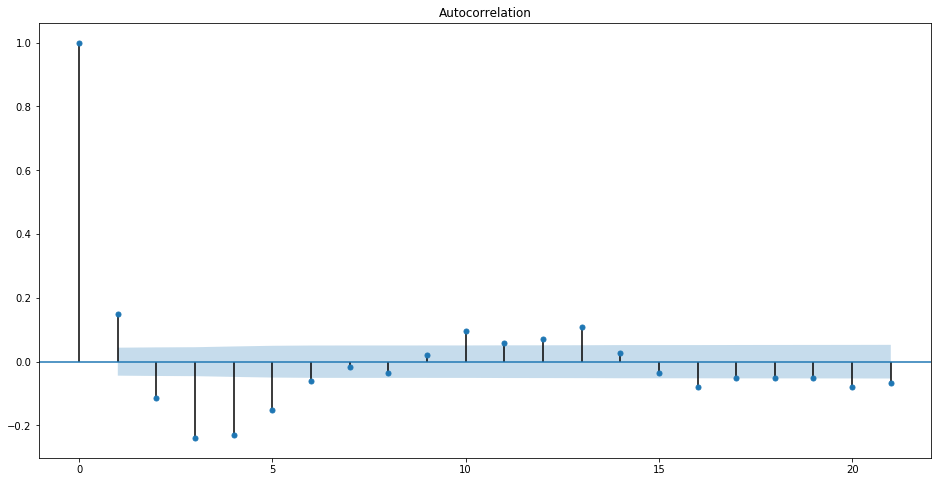

In [72]:
from statsmodels.graphics.tsaplots import plot_acf

remainder = seasonal_decompose(global_temp['anomalies'], model='additive', freq=10).resid
plot_acf(remainder.dropna(), lags=21)
plt.show()

Die Korrelationen sind eher schwach und fallen sowohl positiv als auch negativ aus. Es liegt keine Stationarität vor.